In [1]:
cd ../src

/home/sankha/Documents/programs/ML/densityNN/src


Most of the section here is obtained from this website: http://abdulfatir.com/Normalizing-Flows-Part-1/

Given a mapping $f: R^d \Rightarrow R^d$ such that $\mathbf{y} = f(\mathbf{z})$, the PDF of $\mathbf{y} = q_1(\mathbf{y})$ may be obtained from the pdf of $\mathbf{z} = q_0(\mathbf{z})$ as:

\begin{align}
q_1(\mathbf{y}) &= q_0(\mathbf{z}) \Big| \det \frac { \partial f ^ {-1} } {\partial \mathbf{y}}  \Big|  \\
                &= q_0(\mathbf{z}) \Big| \det \frac { \partial f  } {\partial \mathbf{y}}  \Big| ^ {-1} \\
\end{align}

I should work out the equations at another time.

# Planar Flow

The planar flow results from the equation:

$$f(\mathbf{z}) = \mathbf{z} + \mathbf{u}h( \mathbf{w}^T\mathbf{z} + b ) $$

where $\mathbf{u}, \mathbf{w} \in R^n, b \in R$, and $h$ is a nonlinear function such as `tanh`. 

The Jacobian is given by:

$$ \frac { \partial f(\mathbf{z}) } { \partial \mathbf{z} } = \mathbf{I} + \mathbf{u}h'( \mathbf{w}^T\mathbf{z} + b )\mathbf{w}^T  $$

Using the matrix determinant Lemma,

$$ \det \frac { \partial f(\mathbf{z}) } { \partial \mathbf{z} } = 1 + \mathbf{u}h'( \mathbf{w}^T\mathbf{z} + b )\mathbf{w}^T\mathbf{u}  $$



We shall solve the following specific equation:

\begin{align}
q_0(\mathbf{z}) &= N(\mathbf{z} | \mathbf{0}, \mathbf{I} )   \\
\mathbf{w}     &= [5, 0]^T                                    \\
\mathbf{u}     &= [1, 0]^T                                    \\
b              &= 0                                          \\
h(\mathbf{x})  &= \tanh( \mathbf{x} )                   
\end{align}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

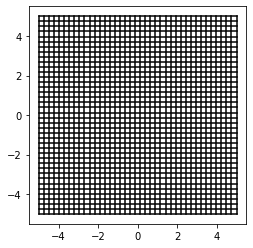

In [122]:
pos = np.linspace(-5, 5, 40)
x, y = [], []
for i, p in enumerate(pos):
    t = np.linspace(-5, 5, 100)
    x.append(t)
    y.append(np.ones( t.shape )*p)
    y.append(t)
    x.append(np.ones( t.shape )*p)
    
xs = np.array(x)
ys = np.array(y)

plt.figure()
_, ax=plt.subplots(1,1)
for x,y in zip(xs, ys):
    plt.plot(x, y, color='black')
ax.set_aspect('equal', 'box')
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

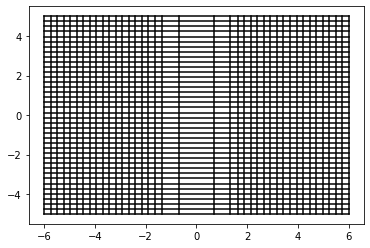

In [123]:
z = np.vstack((xs.flatten(), ys.flatten()))

w = np.array([5, 0]).reshape((-1, 1))
u = np.array([1, 0]).reshape((-1, 1))
b = 0

f = z + u @ np.tanh( w.T @ z + b )
fx = f[0].reshape( xs.shape )
fy = f[1].reshape( ys.shape )

plt.figure()
_, ax=plt.subplots(1,1)
for x,y in zip(fx, fy):
    plt.plot(x, y, color='black')
plt.show()


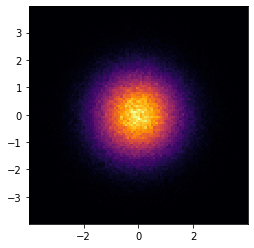

In [179]:
x, y, t = np.random.random((3, 10000000))
x = (x - 0.5) * 8
y = (y - 0.5) * 8
mask = (1/np.sqrt(2*np.pi)) * (np.exp(-(x**2 + y**2)/2) )  >= t
x, y = x[mask], y[mask]

# Plot the figure
_, ax=plt.subplots(1,1)
_ = plt.hist2d(x, y, bins=100, cmap=plt.cm.inferno)
ax.set_aspect('equal', 'box')
plt.show()
plt.close()

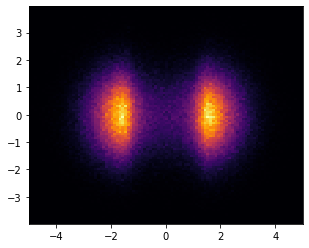

In [180]:
z = np.vstack((x.flatten(), y.flatten()))
f_comp = z + u @ np.tanh( w.T @ z + b )

_, ax=plt.subplots(1,1)
_ = plt.hist2d(f_comp[0], f_comp[1], bins=100, cmap=plt.cm.inferno)
ax.set_aspect('equal', 'box')
plt.show()
plt.close()

# Radial flow

Radial flows use the functional form:

$$ f( \mathbf{z} ) = \mathbf{z} + \beta h(\alpha, r)( \mathbf{z} - \mathbf{z}_0 )  $$

Here,

$\alpha \in R^+, \beta \in R, h(\alpha, r) = (\alpha + r)^{-1}$, and $r = || \mathbf{z} - \mathbf{z}_0 ||$


$$  \det \frac {\partial f(\mathbf{z})} {\partial \mathbf{z}} = (1 + \beta h(\alpha,r)+ \beta h'(\alpha,r) )(1 + \beta h(\alpha,r))^{d-1} $$

We shall be specifically be looking at the following conditions:

\begin{align}
q_0(\mathbf{z}) &= N(\mathbf{z}; \mathbf{0}, \mathbf{I})           \\
\mathbf{z}_0    &= [1, 0]^T                                        \\
\alpha          &= 2                                               \\
\beta           &= 5
\end{align}

<Figure size 432x288 with 0 Axes>

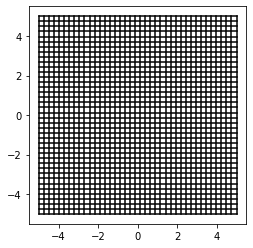

In [124]:
pos = np.linspace(-5, 5, 40)
x, y = [], []
for i, p in enumerate(pos):
    t = np.linspace(-5, 5, 100)
    x.append(t)
    y.append(np.ones( t.shape )*p)
    y.append(t)
    x.append(np.ones( t.shape )*p)
    
xs = np.array(x)
ys = np.array(y)

plt.figure()
_, ax=plt.subplots(1,1)
for x,y in zip(xs, ys):
    plt.plot(x, y, color='black')
ax.set_aspect('equal', 'box')
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

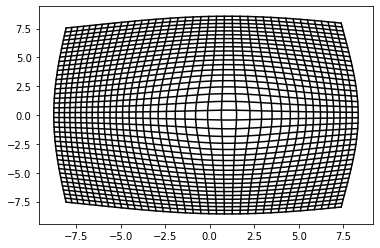

In [139]:
z = np.vstack((xs.flatten(), ys.flatten()))

alpha, beta = 2, 5
z0 = np.array([1, 0]).reshape((-1, 1))
r = np.sqrt(((z - z0)**2).sum(axis=0))
h = 1/(alpha + r)

f = z + beta * h * (z - z0)
fx = f[0].reshape( xs.shape )
fy = f[1].reshape( ys.shape )

plt.figure()
_, ax=plt.subplots(1,1)
for x,y in zip(fx, fy):
    plt.plot(x, y, color='black')
plt.show()
ax.set_aspect('equal', 'box')
plt.show()
plt.close()

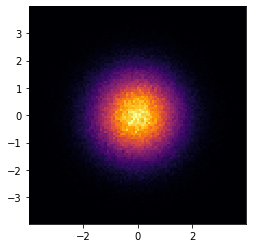

In [178]:
x, y, t = np.random.random((3, 10000000))
x = (x - 0.5) * 8
y = (y - 0.5) * 8
mask = (1/np.sqrt(2*np.pi)) * (np.exp(-(x**2 + y**2)/2) )  >= t
x, y = x[mask], y[mask]

# Plot the figure
_, ax=plt.subplots(1,1)
_ = plt.hist2d(x, y, bins=100, cmap=plt.cm.inferno)
ax.set_aspect('equal', 'box')
plt.show()
plt.close()

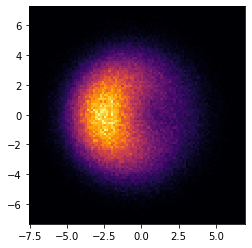

In [177]:
z = np.vstack((x.flatten(), y.flatten()))

alpha, beta = 2, 5
z0 = np.array([1, 0]).reshape((-1, 1))
r = np.sqrt(((z - z0)**2).sum(axis=0))
h = 1/(alpha + r)

f_comp = z + beta * h * (z - z0)


_, ax=plt.subplots(1,1)
_ = plt.hist2d(f_comp[0], f_comp[1], bins=100, cmap=plt.cm.inferno)
ax.set_aspect('equal', 'box')
plt.show()
plt.close()